# **ANOMALY DETECTION IN SOCIAL NETWORK**

---




## **Data Sets used :**



*   facebook : (http://networkrepository.com/socfb-Duke14.php) 


---



## **Mounting Google Drive :**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **Importing Packages :**

In [ ]:
import pandas as pd
import csv
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols
from sklearn import metrics
from sklearn.metrics import r2_score
import pickle

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



---

##**Importing Datasets :**

In [ ]:
import pickle

filename = '/content/gdrive/My Drive/Project/Models/graphobjectfb.sav'
G = pickle.load(open(filename, 'rb'))

filename = '/content/gdrive/My Drive/Project/Models/finalized_model1fb.sav'
model1 = pickle.load(open(filename, 'rb'))

filename = '/content/gdrive/My Drive/Project/Models/finalized_model2fb.sav'
model2 = pickle.load(open(filename, 'rb'))

filename = '/content/gdrive/My Drive/Project/Models/finalized_model3fb.sav'
model3 = pickle.load(open(filename, 'rb'))

filename = '/content/gdrive/My Drive/Project/Models/egonet.sav'
ego_g = pickle.load(open(filename, 'rb'))

ddd=pd.read_csv('/content/gdrive/My Drive/Project/Dataset/final_dataset1.csv')
print(ddd)

df=pd.read_csv('/content/gdrive/My Drive/Project/Dataset/train_dataset.csv')
print(df)

dft=pd.read_csv('/content/gdrive/My Drive/Project/Dataset/test_dataset.csv')
print(dft)

      nodes_name  nodes  betweenness  closeness  brokerage  edges
0              1      5     0.200000   0.250000          1      9
1              2    133    48.954887   0.007576       6511   2267
2              3    245    97.877551   0.004098      23980   5910
3              4     38     8.263158   0.027027        314    389
4              5    227    96.312775   0.004425      21863   3788
...          ...    ...          ...        ...        ...    ...
9880        9881    208    91.817308   0.004831      19098   2430
9881        9882    189    74.645503   0.005319      14108   3658
9882        9883     25     7.160000   0.041667        179    121
9883        9884    113    38.840708   0.008929       4389   1939
9884        9885     54    17.148148   0.018868        926    505

[9885 rows x 6 columns]
      betweenness  closeness  brokerage  edges
0       56.507246   0.007299       7798   1655
1        8.423077   0.040000        219    106
2      121.423611   0.003484      34970   

In [ ]:
X1_test=list (dft['betweenness'])
X2_test=list (dft['closeness'])
X3_test=list (dft['brokerage'])
y1_test=list (dft['edges'])
print(y1_test)
print(nx.info(G))
print(nx.info(ego_g['1']))
node_names=list (G)

c1,q1=model1.params
c1=2.71828 ** c1
c2,q2=model2.params
c2=2.71828 ** c2
c3,q3=model3.params
c3=2.71828 ** c3

[32, 45, 2291, 240, 62, 3120, 1950, 78, 3812, 525, 1235, 5, 120, 1130, 96, 239, 1643, 830, 511, 2251, 28, 2565, 4735, 3725, 1851, 1021, 788, 3726, 2187, 13, 654, 1029, 1399, 1109, 59, 1019, 1541, 295, 15, 300, 5219, 1, 1951, 361, 704, 260, 1841, 11, 6524, 811, 2913, 654, 9383, 1120, 2163, 7966, 1183, 1, 3659, 736, 518, 2620, 1389, 1744, 30, 609, 1504, 46, 126, 1376, 14, 466, 526, 194, 3652, 8240, 55, 1235, 1, 11562, 1235, 659, 14, 4676, 4, 13889, 1979, 7343, 448, 4004, 3758, 3211, 223, 1, 896, 3218, 320, 550, 303, 3057, 71, 312, 8843, 1951, 1492, 30, 2875, 2713, 864, 758, 25, 244, 1644, 2733, 3741, 1918, 43, 84, 6, 2158, 15, 4389, 3787, 554, 289, 5, 3158, 445, 9238, 6316, 1, 2197, 648, 1951, 452, 880, 5187, 1, 162, 160, 1165, 1189, 3455, 480, 178, 724, 3316, 445, 1099, 3365, 115, 3734, 55, 3516, 5, 4, 194, 4, 15712, 32, 211, 1520, 3744, 2024, 418, 1134, 465, 1034, 3162, 1449, 1171, 1449, 63, 2147, 1468, 6, 15, 873, 3461, 2235, 31, 134, 641, 1493, 336, 367, 6788, 87, 7241, 479, 428, 156

## **Testing :**


---



### **Power Law (Betweenness):**


---


In [ ]:

dft=dft.sort_values(by = 'betweenness',ascending=True)
dft=dft.reset_index(drop=True)
print (dft)
dft = dft[dft.betweenness != 0]
dft=dft.reset_index(drop=True)
print (dft)


      betweenness  closeness  brokerage  edges
0        0.000000   1.000000          0      1
1        0.000000   1.000000          0      1
2        0.000000   0.500000          0      3
3        0.000000   1.000000          0      1
4        0.000000   1.000000          0      1
...           ...        ...        ...    ...
1972   275.947368   0.001701     162533  10633
1973   282.668285   0.001621     174689  15964
1974   306.062794   0.001572     194962   7604
1975   330.995845   0.001387     238979  21302
1976   336.913287   0.001401     240893  14362

[1977 rows x 4 columns]
      betweenness  closeness  brokerage  edges
0        0.166667   0.200000          1     14
1        0.200000   0.250000          1      9
2        0.200000   0.250000          1      9
3        0.250000   0.333333          1      5
4        0.250000   0.333333          1      5
...           ...        ...        ...    ...
1892   275.947368   0.001701     162533  10633
1893   282.668285   0.001621     17

      betweenness    edges_hat1  closeness  brokerage  edges
0        0.166667      0.887893   0.200000          1     14
1        0.200000      1.128097   0.250000          1      9
2        0.200000      1.128097   0.250000          1      9
3        0.250000      1.512221   0.333333          1      5
4        0.250000      1.512221   0.333333          1      5
...           ...           ...        ...        ...    ...
1892   275.947368  14987.722578   0.001701     162533  10633
1893   282.668285  15468.933277   0.001621     174689  15964
1894   306.062794  17171.648698   0.001572     194962   7604
1895   330.995845  19031.754099   0.001387     238979  21302
1896   336.913287  19479.831077   0.001401     240893  14362

[1897 rows x 5 columns]


Text(0, 0.5, 'No. of Edges')

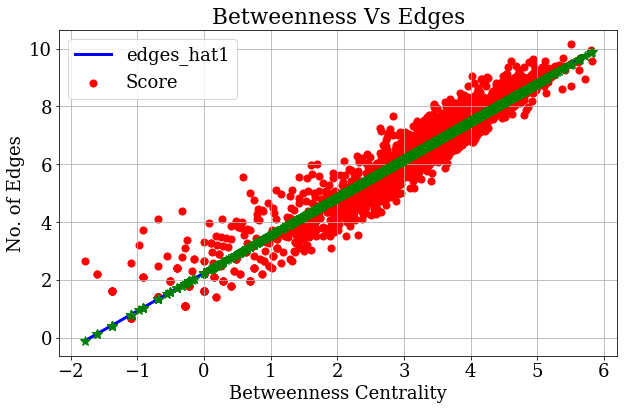

In [ ]:
edges_hat1 = c1 * (dft[['betweenness']]**q1)
dft.insert(loc =1,value =edges_hat1,column='edges_hat1')
print(dft)

log_edges=np.log(dft[['edges']])
log_betweenness=(np.log(dft[['betweenness']]))
log_edgeshat1=np.log(dft[['edges_hat1']])

matplotlib.rcParams.update({'font.size':18,"font.family":'serif'})

fig , me=plt.subplots(figsize=(10,6))

me.scatter(log_betweenness,log_edges,s=50,color='red',label='Score')
me.plot(log_betweenness,log_edgeshat1,lw=3,label='edges_hat1',color='blue')
me.plot(log_betweenness,log_edgeshat1, r'g*', markersize=10)
me.legend(loc=0)
me.grid(True)
plt.title("Betweenness Vs Edges")
plt.xlabel("Betweenness Centrality")
plt.ylabel("No. of Edges")

In [ ]:
from sklearn.metrics import r2_score
def mymodel(x):
  y=[]
  for i in x:
    if (i==0):
      y.append(0)
    else:  
      y.append(c1 * i**q1)
  return y

r2 = r2_score(y1_test, mymodel(X1_test))

print(r2)

0.7857589106868987


### **Power Law (Closeness):**


---


In [ ]:

dft=dft.sort_values(by = 'closeness',ascending=True)
dft=dft.reset_index(drop=True)
print (dft)
dft = dft[dft.closeness != 0]
dft=dft.reset_index(drop=True)
print (dft)


      betweenness    edges_hat1  closeness  brokerage  edges
0      330.995845  19031.754099   0.001387     238979  21302
1      336.913287  19479.831077   0.001401     240893  14362
2      306.062794  17171.648698   0.001572     194962   7604
3      282.668285  15468.933277   0.001621     174689  15964
4      275.565217  14960.470286   0.001675     164788  13715
...           ...           ...        ...        ...    ...
1892     0.333333      2.206445   0.500000          1      2
1893     0.333333      2.206445   0.500000          1      2
1894     0.333333      2.206445   0.500000          1      2
1895     0.333333      2.206445   0.500000          1      2
1896     0.333333      2.206445   0.500000          1      2

[1897 rows x 5 columns]
      betweenness    edges_hat1  closeness  brokerage  edges
0      330.995845  19031.754099   0.001387     238979  21302
1      336.913287  19479.831077   0.001401     240893  14362
2      306.062794  17171.648698   0.001572     194962   7604

      betweenness    edges_hat2    edges_hat1  closeness  brokerage  edges
0      330.995845  28332.844399  19031.754099   0.001387     238979  21302
1      336.913287  27884.281864  19479.831077   0.001401     240893  14362
2      306.062794  23076.936094  17171.648698   0.001572     194962   7604
3      282.668285  21959.996845  15468.933277   0.001621     174689  15964
4      275.565217  20807.671695  14960.470286   0.001675     164788  13715
...           ...           ...           ...        ...        ...    ...
1892     0.333333      1.861490      2.206445   0.500000          1      2
1893     0.333333      1.861490      2.206445   0.500000          1      2
1894     0.333333      1.861490      2.206445   0.500000          1      2
1895     0.333333      1.861490      2.206445   0.500000          1      2
1896     0.333333      1.861490      2.206445   0.500000          1      2

[1897 rows x 6 columns]


Text(0, 0.5, 'No. of Edges')

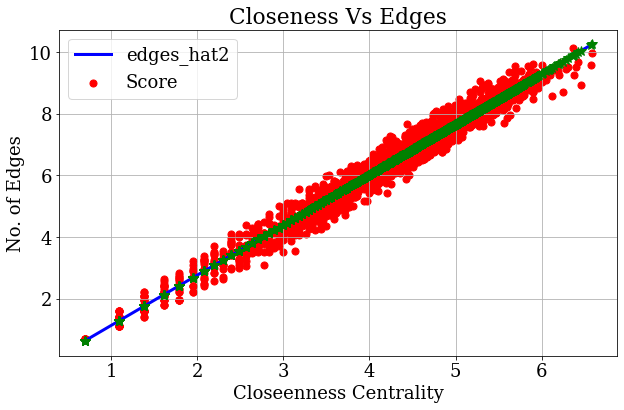

In [ ]:
edges_hat2 = c2 * dft[['closeness']]**(q2)
dft.insert(loc =1,value =edges_hat2,column='edges_hat2')
print(dft)

log_edges=np.log(dft[['edges']])
log_closeness=-(np.log(dft[['closeness']]))
log_edgeshat2=np.log(dft[['edges_hat2']])

matplotlib.rcParams.update({'font.size':18,"font.family":'serif'})

fig , me=plt.subplots(figsize=(10,6))

me.scatter(log_closeness,log_edges,s=50,color='red',label='Score')
me.plot(log_closeness,log_edgeshat2,lw=3,label='edges_hat2',color='blue')
me.plot(log_closeness,log_edgeshat2, r'g*', markersize=10)
me.legend(loc=0)
me.grid(True)
plt.title("Closeness Vs Edges")
plt.xlabel("Closeenness Centrality")
plt.ylabel("No. of Edges")

In [ ]:
from sklearn.metrics import r2_score
def mymodel(x):
  y=[]
  for i in x:
    if (i==0):
      y.append(0)
    else:  
      y.append(c2 * i**q2)
  return y

r2 = r2_score(y1_test, mymodel(X2_test))
print(r2)

0.8249544204058076


### **Power Law (Brokerage):**


---


In [ ]:

dft=dft.sort_values(by = 'brokerage',ascending=True)
dft=dft.reset_index(drop=True)
print (dft)
dft = dft[dft.brokerage != 0]
dft=dft.reset_index(drop=True)
print (dft)


      betweenness    edges_hat2    edges_hat1  closeness  brokerage  edges
0        0.333333      1.861490      2.206445   0.500000          1      2
1        0.200000      5.784518      1.128097   0.250000          1      9
2        0.200000      5.784518      1.128097   0.250000          1      9
3        0.333333      1.861490      2.206445   0.500000          1      2
4        0.250000      3.613267      1.512221   0.333333          1      5
...           ...           ...           ...        ...        ...    ...
1892   275.565217  20807.671695  14960.470286   0.001675     164788  13715
1893   282.668285  21959.996845  15468.933277   0.001621     174689  15964
1894   306.062794  23076.936094  17171.648698   0.001572     194962   7604
1895   330.995845  28332.844399  19031.754099   0.001387     238979  21302
1896   336.913287  27884.281864  19479.831077   0.001401     240893  14362

[1897 rows x 6 columns]
      betweenness    edges_hat2    edges_hat1  closeness  brokerage  edges


      betweenness    edges_hat3    edges_hat2  ...  closeness  brokerage  edges
0        0.333333      2.335128      1.861490  ...   0.500000          1      2
1        0.200000      2.335128      5.784518  ...   0.250000          1      9
2        0.200000      2.335128      5.784518  ...   0.250000          1      9
3        0.333333      2.335128      1.861490  ...   0.500000          1      2
4        0.250000      2.335128      3.613267  ...   0.333333          1      5
...           ...           ...           ...  ...        ...        ...    ...
1892   275.565217  18518.179587  20807.671695  ...   0.001675     164788  13715
1893   282.668285  19343.637908  21959.996845  ...   0.001621     174689  15964
1894   306.062794  20998.047933  23076.936094  ...   0.001572     194962   7604
1895   330.995845  24448.884616  28332.844399  ...   0.001387     238979  21302
1896   336.913287  24595.093531  27884.281864  ...   0.001401     240893  14362

[1897 rows x 7 columns]


Text(0, 0.5, 'No. of Edges')

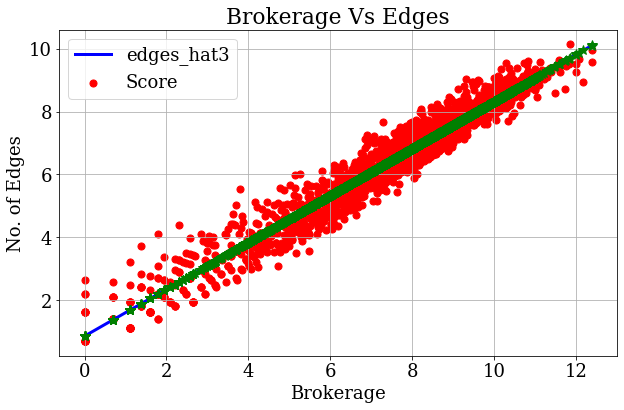

In [ ]:
edges_hat3 = c3 * (dft[['brokerage']]**q3)
dft.insert(loc =1,value =edges_hat3,column='edges_hat3')
print(dft)

log_edges=np.log(dft[['edges']])
log_brokerage=(np.log(dft[['brokerage']]))
log_edgeshat3=np.log(dft[['edges_hat3']])

matplotlib.rcParams.update({'font.size':18,"font.family":'serif'})

fig , me=plt.subplots(figsize=(10,6))

me.scatter(log_brokerage,log_edges,s=50,color='red',label='Score')
me.plot(log_brokerage,log_edgeshat3,lw=3,label='edges_hat3',color='blue')
me.plot(log_brokerage,log_edgeshat3, r'g*', markersize=10)
me.legend(loc=0)
me.grid(True)
plt.title("Brokerage Vs Edges")
plt.xlabel("Brokerage")
plt.ylabel("No. of Edges")

In [ ]:
from sklearn.metrics import r2_score
def mymodel(x):
  y=[]
  for i in x:
    if (i==0):
      y.append(0)
    else:  
      y.append(c3 * (i**q3))
  return y

r2 = r2_score(y1_test, mymodel(X3_test))
print(r2)

0.8157553128483896
